In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/project/Dataset_Ads.csv')

In [4]:
df.head(5)

,Age,Gender,Income,Location,Ad Type,Ad Topic,Ad Placement,Clicks,Click Time,Conversion Rate,CTR
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,2024-01-18 20:45:56.898459,0.0981,0.0737
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,2023-04-24 20:45:56.898459,0.0937,0.0592
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,2024-02-24 20:45:56.898459,0.1912,0.0563
3,68,Female,64585.73,Suburban,Text,Health,Website,6,2023-12-13 20:45:56.898459,0.1122,0.0232
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,2023-07-02 20:45:56.898459,0.1426,0.0539


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Income           10000 non-null  float64
 3   Location         10000 non-null  object 
 4   Ad Type          10000 non-null  object 
 5   Ad Topic         10000 non-null  object 
 6   Ad Placement     10000 non-null  object 
 7   Clicks           10000 non-null  int64  
 8   Click Time       10000 non-null  object 
 9   Conversion Rate  10000 non-null  float64
 10  CTR              10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


In [6]:
df.describe()
print(df.isna().sum())
# Wow! No missing data. How the helly did they make this? Whatever I guess.


Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64


In [7]:
# Great piece of code here wow.
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals < 15:  # show actual values if few
        print(df[col].unique(), "\n")


Age: 100 unique values
Gender: 3 unique values
['Male' 'Female' 'Other'] 

Income: 9994 unique values
Location: 3 unique values
['Urban' 'Rural' 'Suburban'] 

Ad Type: 4 unique values
['Banner' 'Video' 'Text' 'Native'] 

Ad Topic: 6 unique values
['Travel' 'Food' 'Health' 'Fashion' 'Technology' 'Finance'] 

Ad Placement: 3 unique values
['Social Media' 'Search Engine' 'Website'] 

Clicks: 17 unique values
Click Time: 6503 unique values
Conversion Rate: 3955 unique values
CTR: 1008 unique values


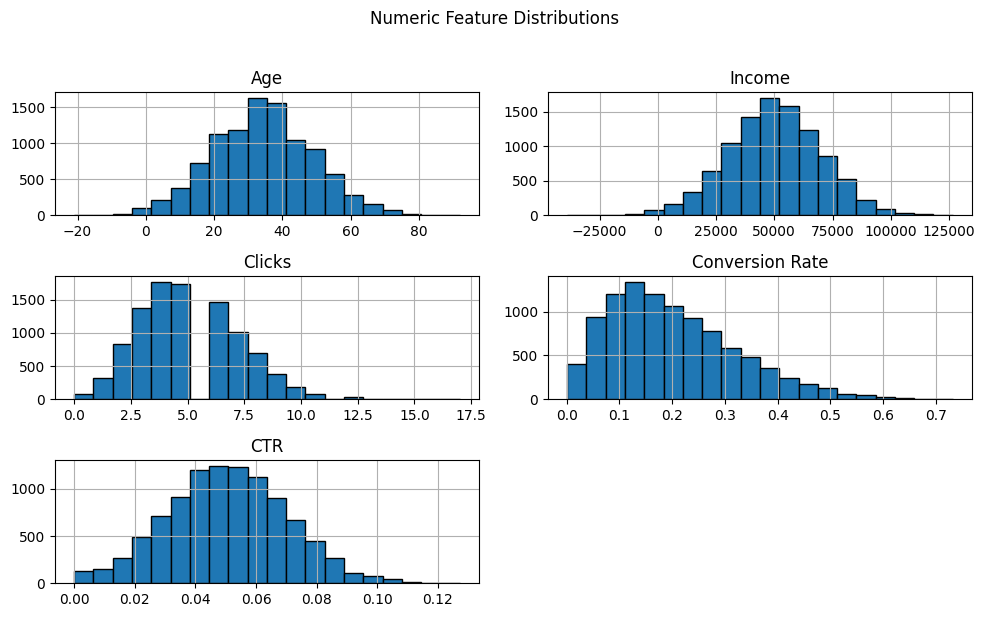

In [8]:
# okay this is good cause I need to see the distribution.
numeric_cols = ['Age', 'Income', 'Clicks', 'Conversion Rate', 'CTR']

df[numeric_cols].hist(bins=20, figsize=(10,6), edgecolor='black')
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


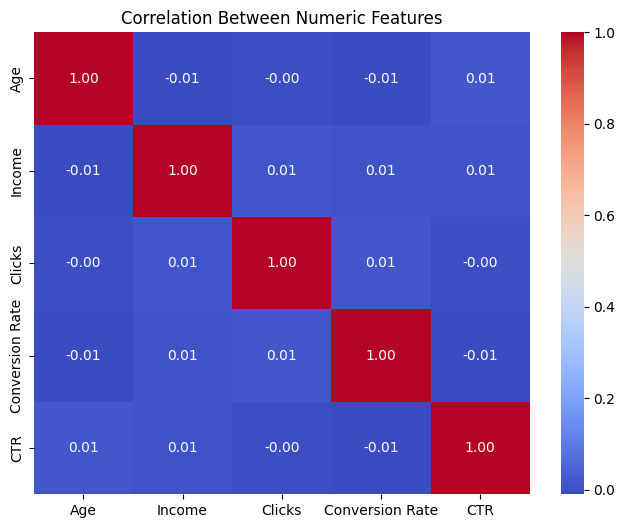

In [9]:
# This one is hard to understand tbh
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_4144\3244514290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Income', palette='pastel')


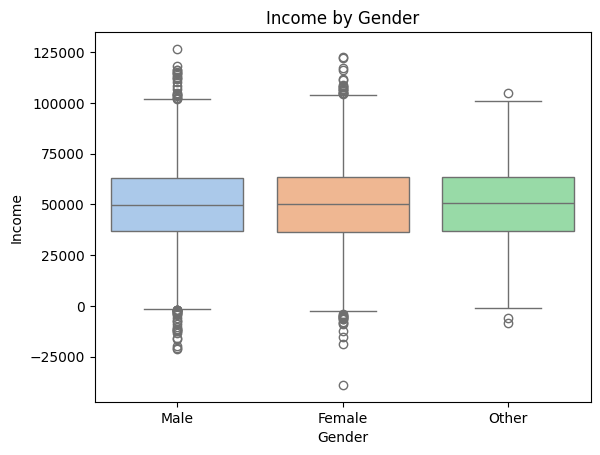

C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_4144\3244514290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ad Type', y='CTR', palette='pastel')


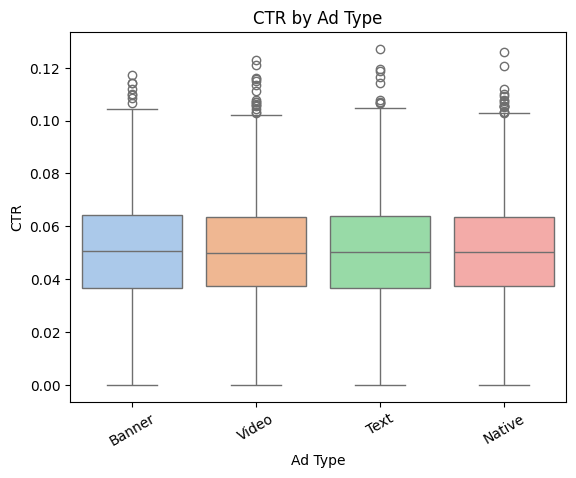

C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_4144\3244514290.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ad Type', y='Conversion Rate', palette='pastel')


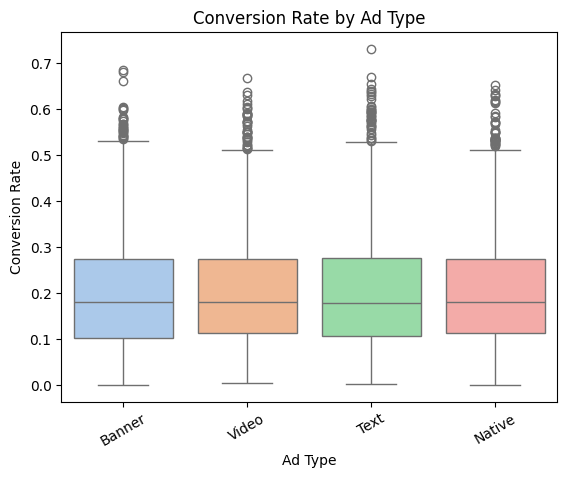

In [10]:
# THis has some interesting stuff... Hmm
sns.boxplot(data=df, x='Gender', y='Income', palette='pastel')
plt.title("Income by Gender")
plt.show()

sns.boxplot(data=df, x='Ad Type', y='CTR', palette='pastel')
plt.title("CTR by Ad Type")
plt.xticks(rotation=30)
plt.show()

sns.boxplot(data=df, x='Ad Type', y='Conversion Rate', palette='pastel')
plt.title("Conversion Rate by Ad Type")
plt.xticks(rotation=30)
plt.show()


C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_4144\3751190304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Click Month', palette='pastel', order=df['Click Month'].value_counts().index)


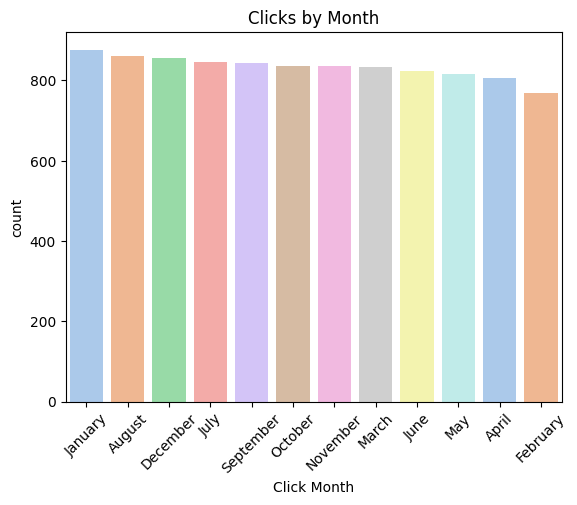

In [11]:
# I like this because now I have more time series data, and I can see when there is more clicks per month.
df['Click Time'] = pd.to_datetime(df['Click Time'])
df['Click Hour'] = df['Click Time'].dt.hour
df['Click Month'] = df['Click Time'].dt.month_name()

sns.countplot(data=df, x='Click Month', palette='pastel', order=df['Click Month'].value_counts().index)
plt.title("Clicks by Month")
plt.xticks(rotation=45)
plt.show()


In [12]:
df.info()
# notice we have a datatime64 Dtype now, and then there are two new columns since we extracted data from click time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Age              10000 non-null  int64         
 1   Gender           10000 non-null  object        
 2   Income           10000 non-null  float64       
 3   Location         10000 non-null  object        
 4   Ad Type          10000 non-null  object        
 5   Ad Topic         10000 non-null  object        
 6   Ad Placement     10000 non-null  object        
 7   Clicks           10000 non-null  int64         
 8   Click Time       10000 non-null  datetime64[ns]
 9   Conversion Rate  10000 non-null  float64       
 10  CTR              10000 non-null  float64       
 11  Click Hour       10000 non-null  int32         
 12  Click Month      10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(6)
memory usage: 976.7+ KB


In [13]:
# Creates new coluns wcih idk fi 
print(df.groupby('Gender')[['Clicks', 'CTR', 'Conversion Rate']].mean())
print(df.groupby('Ad Type')[['Clicks', 'CTR', 'Conversion Rate']].mean())

          Clicks       CTR  Conversion Rate
Gender                                     
Female  5.030540  0.050767         0.201616
Male    5.035700  0.050153         0.203369
Other   5.006654  0.050425         0.199294
           Clicks       CTR  Conversion Rate
Ad Type                                     
Banner   5.014062  0.050403         0.200075
Native   5.079513  0.050441         0.204576
Text     5.049513  0.050205         0.201899
Video    4.980884  0.050647         0.202512


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Age              10000 non-null  int64         
 1   Gender           10000 non-null  object        
 2   Income           10000 non-null  float64       
 3   Location         10000 non-null  object        
 4   Ad Type          10000 non-null  object        
 5   Ad Topic         10000 non-null  object        
 6   Ad Placement     10000 non-null  object        
 7   Clicks           10000 non-null  int64         
 8   Click Time       10000 non-null  datetime64[ns]
 9   Conversion Rate  10000 non-null  float64       
 10  CTR              10000 non-null  float64       
 11  Click Hour       10000 non-null  int32         
 12  Click Month      10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(6)
memory usage: 976.7+ KB


### Claude popped off and did a bunch of code here

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
df = pd.read_csv('../datasets/project/Dataset_Ads.csv')

# Data inspection and cleaning
print("="*80)
print("DATA INSPECTION")
print("="*80)
print("\nDataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Convert Click Time to datetime if needed
df['Click Time'] = pd.to_datetime(df['Click Time'])

# Ensure numeric columns are properly typed
numeric_cols = ['Age', 'Income', 'Clicks', 'Conversion Rate', 'CTR']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with missing values in key columns
df_clean = df.dropna(subset=numeric_cols)
print(f"\nRows after cleaning: {len(df_clean)} (dropped {len(df) - len(df_clean)} rows)")

# Create dummy variables for categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Location', 'Ad Type', 'Ad Topic', 'Ad Placement'], 
                             drop_first=True)

# Verify no object types remain in encoded data
print("\nEncoded data types:")
print(df_encoded.dtypes.value_counts())

print("="*80)
print("ECONOMETRIC DIAGNOSTICS ANALYSIS")
print("="*80)

# ============================================================================
# 1. ENDOGENEITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("1. ENDOGENEITY ANALYSIS")
print("="*80)

print("\nPotential Endogeneity Issues:")
print("-" * 40)

# Check correlation between Clicks and dependent variables
print("\n1.1 Correlation Analysis (Potential Endogeneity Red Flags):")
print("-" * 40)
corr_matrix = df_clean[['Clicks', 'CTR', 'Conversion Rate', 'Age', 'Income']].corr()
print("\nCorrelation with Clicks (potential endogenous variable):")
print(corr_matrix['Clicks'].sort_values(ascending=False))


# Test for endogeneity using Hausman-Wu test approach
print("\n1.2 Testing for Endogeneity (Hausman-Wu Test Approach):")
print("-" * 40)

# Prepare variables for Conversion Rate model
y = df_encoded['Conversion Rate'].values
X_vars = ['Age', 'Income', 'Clicks']
X_cats = [col for col in df_encoded.columns if col.startswith(('Gender_', 'Location_', 
          'Ad Type_', 'Ad Topic_', 'Ad Placement_'))]

# Ensure all columns exist and are numeric
available_X_vars = [v for v in X_vars if v in df_encoded.columns]
available_X_cats = [c for c in X_cats if c in df_encoded.columns]

print(f"Using {len(available_X_vars)} numeric variables: {available_X_vars}")
print(f"Using {len(available_X_cats)} categorical dummy variables")

X = df_encoded[available_X_vars + available_X_cats].astype(float)
X = add_constant(X)

# Stage 1: Regress potentially endogenous variable (Clicks) on instruments + exogenous
# Using Age and Income as instruments (assuming they're exogenous)
instruments = ['Age', 'Income'] + available_X_cats
available_instruments = [i for i in instruments if i in df_encoded.columns]
X_stage1 = df_encoded[available_instruments].astype(float)
X_stage1 = add_constant(X_stage1)

try:
    model_stage1 = OLS(df_encoded['Clicks'].astype(float).values, X_stage1).fit()
    residuals_stage1 = model_stage1.resid

    # Stage 2: Include residuals in original regression
    X_with_resid = X.copy()
    X_with_resid['clicks_residual'] = residuals_stage1
    model_stage2 = OLS(y, X_with_resid).fit()

    # Test if residual coefficient is significant
    resid_pvalue = model_stage2.pvalues['clicks_residual']
    print(f"\nResidual coefficient p-value: {resid_pvalue:.4f}")
    if resid_pvalue < 0.05:
        print("✗ ENDOGENEITY DETECTED: Clicks appears to be endogenous (p < 0.05)")
        print("  Recommendation: Use Instrumental Variables (IV) regression or 2SLS")
    else:
        print("✓ No strong evidence of endogeneity in Clicks (p ≥ 0.05)")
except Exception as e:
    print(f"⚠️  Could not complete endogeneity test: {str(e)}")
    print("   This may be due to perfect multicollinearity or data issues")

# Calculate VIF for multicollinearity (related to endogeneity)
print("\n1.3 Variance Inflation Factors (VIF) - Multicollinearity Check:")
print("-" * 40)
try:
    X_vif = df_encoded[['Age', 'Income', 'Clicks']].astype(float)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    print(vif_data)
    print("\nVIF > 10 suggests high multicollinearity (potential endogeneity concern)")
except Exception as e:
    print(f"⚠️  Could not calculate VIF: {str(e)}")


DATA INSPECTION

Dataset shape: (10000, 11)

Column data types:
Age                  int64
Gender              object
Income             float64
Location            object
Ad Type             object
Ad Topic            object
Ad Placement        object
Clicks               int64
Click Time          object
Conversion Rate    float64
CTR                float64
dtype: object

First few rows:
   Age  Gender    Income  Location Ad Type Ad Topic   Ad Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click Time  Conversion Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.89


2. HETEROSKEDASTICITY ANALYSIS

2.1 Breusch-Pagan Test:
----------------------------------------
LM Statistic: 23.4603
LM-Test p-value: 0.1349
F-Statistic: 1.3808
F-Test p-value: 0.1348
✓ No strong evidence of heteroskedasticity (p ≥ 0.05)

2.2 White Test:
----------------------------------------
LM Statistic: 138.6292
LM-Test p-value: 0.5169
F-Statistic: 0.9900
F-Test p-value: 0.5178
✓ No strong evidence of heteroskedasticity (p ≥ 0.05)

2.3 Visual Inspection:
----------------------------------------
Generating residual plots...


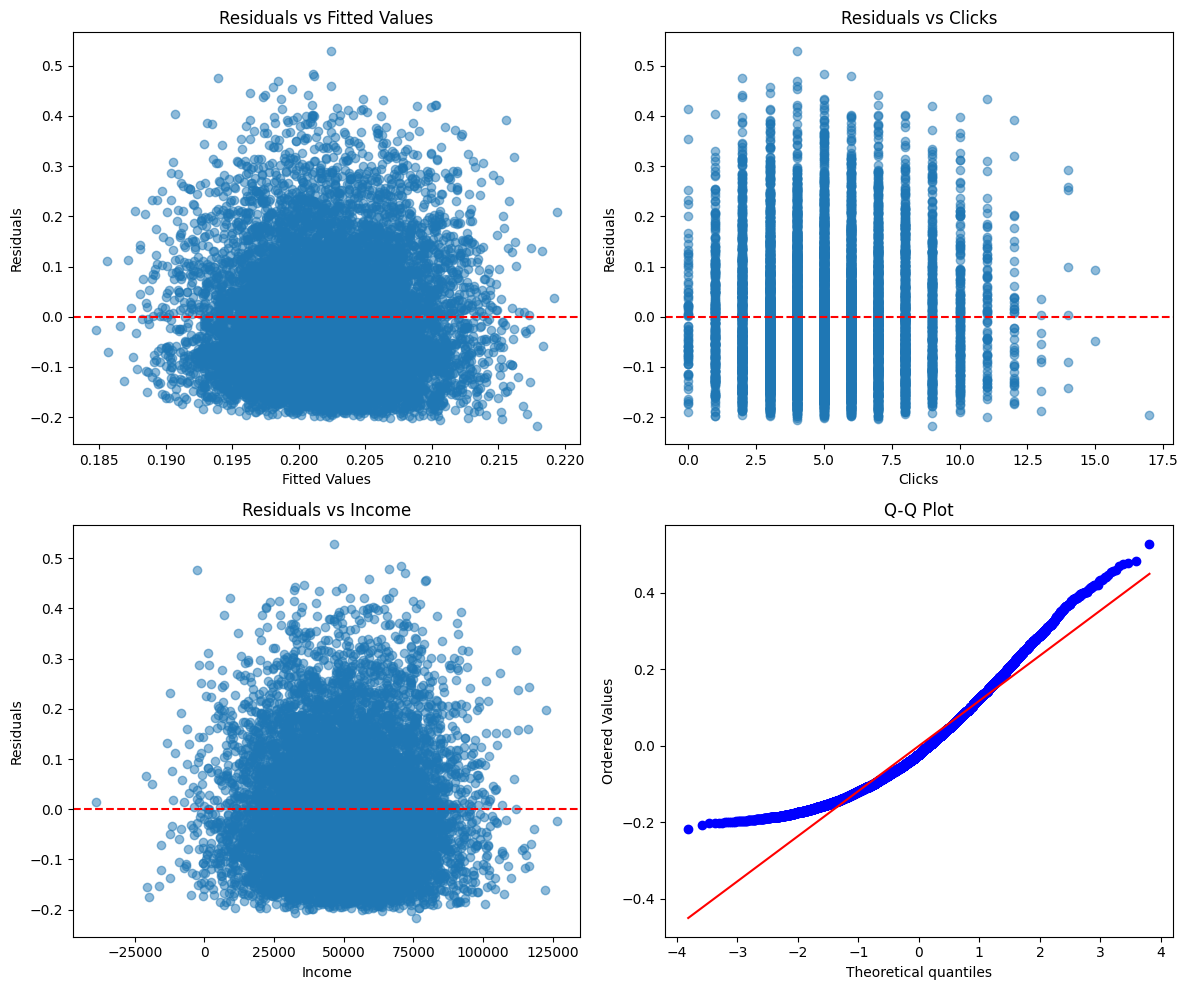

In [16]:

# ============================================================================
# 2. HETEROSKEDASTICITY TESTS
# ============================================================================
print("\n" + "="*80)
print("2. HETEROSKEDASTICITY ANALYSIS")
print("="*80)

# Run base model for heteroskedasticity tests
try:
    base_model = OLS(y, X).fit()
    
    # Breusch-Pagan Test
    print("\n2.1 Breusch-Pagan Test:")
    print("-" * 40)
    bp_test = het_breuschpagan(base_model.resid, X)
    labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
    bp_results = dict(zip(labels, bp_test))
    for key, val in bp_results.items():
        print(f"{key}: {val:.4f}")

    if bp_results['LM-Test p-value'] < 0.05:
        print("✗ HETEROSKEDASTICITY DETECTED (p < 0.05)")
        print("  Recommendation: Use robust standard errors (HC1, HC3) or WLS")
    else:
        print("✓ No strong evidence of heteroskedasticity (p ≥ 0.05)")

    # White Test
    print("\n2.2 White Test:")
    print("-" * 40)
    white_test = het_white(base_model.resid, X)
    labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
    white_results = dict(zip(labels, white_test))
    for key, val in white_results.items():
        print(f"{key}: {val:.4f}")

    if white_results['LM-Test p-value'] < 0.05:
        print("✗ HETEROSKEDASTICITY DETECTED (p < 0.05)")
    else:
        print("✓ No strong evidence of heteroskedasticity (p ≥ 0.05)")

    # Visualize residuals
    print("\n2.3 Visual Inspection:")
    print("-" * 40)
    print("Generating residual plots...")

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs Fitted
    axes[0, 0].scatter(base_model.fittedvalues, base_model.resid, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted Values')

    # Residuals vs Clicks
    axes[0, 1].scatter(df_clean['Clicks'].values, base_model.resid, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Clicks')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Clicks')

    # Residuals vs Income
    axes[1, 0].scatter(df_clean['Income'].values, base_model.resid, alpha=0.5)
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Income')
    axes[1, 0].set_ylabel('Residuals')
    axes[1, 0].set_title('Residuals vs Income')

    # Q-Q Plot
    stats.probplot(base_model.resid, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot')

    plt.tight_layout()
    # plt.savefig('heteroskedasticity_diagnostics.png', dpi=300, bbox_inches='tight')
    # print("✓ Saved: heteroskedasticity_diagnostics.png")
    
except Exception as e:
    print(f"⚠️  Could not complete heteroskedasticity tests: {str(e)}")
    bp_results = {'LM-Test p-value': None}
    white_results = {'LM-Test p-value': None}



3. AUTOCORRELATION ANALYSIS

3.1 Durbin-Watson Test:
----------------------------------------
Durbin-Watson Statistic: 2.0100

Interpretation:
  DW ≈ 2.0: No autocorrelation
  DW < 1.5: Positive autocorrelation
  DW > 2.5: Negative autocorrelation
✓ No strong evidence of autocorrelation (DW = 2.0100)

3.2 Ljung-Box Test (for higher-order autocorrelation):
----------------------------------------
     lb_stat  lb_pvalue
1   0.259880   0.610202
5   4.823007   0.437860
10  7.141394   0.712033

If p-value < 0.05, autocorrelation is present at that lag


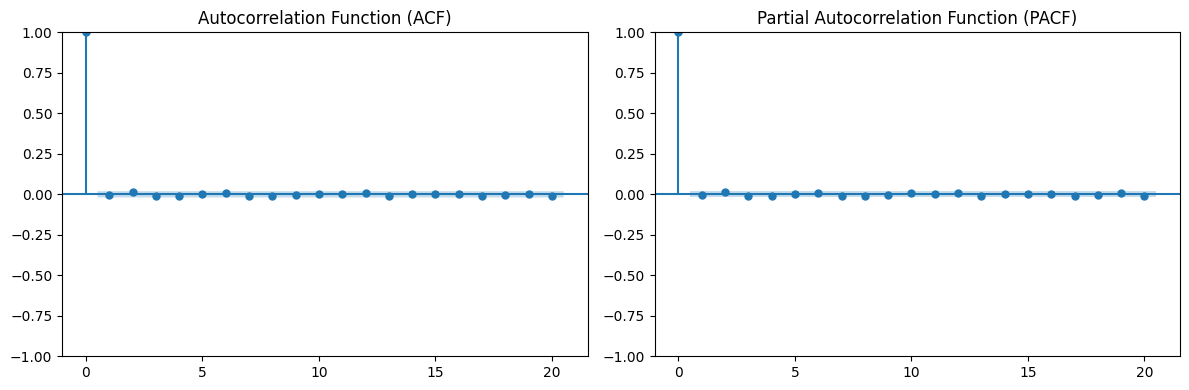

In [17]:

# ============================================================================
# 3. AUTOCORRELATION TESTS
# ============================================================================
print("\n" + "="*80)
print("3. AUTOCORRELATION ANALYSIS")
print("="*80)

# Sort by time for autocorrelation tests
df_sorted = df_clean.sort_values('Click Time').reset_index(drop=True)
df_encoded_sorted = pd.get_dummies(df_sorted, 
                                   columns=['Gender', 'Location', 'Ad Type', 'Ad Topic', 'Ad Placement'], 
                                   drop_first=True)

y_sorted = df_encoded_sorted['Conversion Rate'].values
available_X_cats_sorted = [col for col in df_encoded_sorted.columns if col.startswith(('Gender_', 'Location_', 
          'Ad Type_', 'Ad Topic_', 'Ad Placement_'))]
X_sorted = df_encoded_sorted[available_X_vars + available_X_cats_sorted].astype(float)
X_sorted = add_constant(X_sorted)

try:
    model_sorted = OLS(y_sorted, X_sorted).fit()

    # Durbin-Watson Test
    print("\n3.1 Durbin-Watson Test:")
    print("-" * 40)
    dw_stat = durbin_watson(model_sorted.resid)
    print(f"Durbin-Watson Statistic: {dw_stat:.4f}")
    print("\nInterpretation:")
    print("  DW ≈ 2.0: No autocorrelation")
    print("  DW < 1.5: Positive autocorrelation")
    print("  DW > 2.5: Negative autocorrelation")

    if dw_stat < 1.5:
        print(f"✗ POSITIVE AUTOCORRELATION DETECTED (DW = {dw_stat:.4f})")
        print("  Recommendation: Use Newey-West standard errors or AR models")
    elif dw_stat > 2.5:
        print(f"✗ NEGATIVE AUTOCORRELATION DETECTED (DW = {dw_stat:.4f})")
    else:
        print(f"✓ No strong evidence of autocorrelation (DW = {dw_stat:.4f})")

    # Ljung-Box Test
    print("\n3.2 Ljung-Box Test (for higher-order autocorrelation):")
    print("-" * 40)
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(model_sorted.resid, lags=[1, 5, 10], return_df=True)
    print(lb_test)
    print("\nIf p-value < 0.05, autocorrelation is present at that lag")

    # Autocorrelation plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ACF Plot
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plot_acf(model_sorted.resid, lags=20, ax=axes[0])
    axes[0].set_title('Autocorrelation Function (ACF)')

    # PACF Plot
    plot_pacf(model_sorted.resid, lags=20, ax=axes[1])
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    # plt.savefig('autocorrelation_diagnostics.png', dpi=300, bbox_inches='tight')
    # print("\n✓ Saved: autocorrelation_diagnostics.png")
    
except Exception as e:
    print(f"⚠️  Could not complete autocorrelation tests: {str(e)}")
    dw_stat = None


In [18]:
# ============================================================================
# 4. SUMMARY AND RECOMMENDATIONS
# ============================================================================
print("\n" + "="*80)
print("4. SUMMARY AND RECOMMENDATIONS")
print("="*80)

print("\n📊 Key Findings:")
print("-" * 40)
print(f"1. Endogeneity: Check p-value above (Clicks may be endogenous)")
print(f"2. Heteroskedasticity (BP): {'DETECTED' if bp_results.get('LM-Test p-value') and bp_results['LM-Test p-value'] < 0.05 else 'Not detected or N/A'}")
print(f"3. Heteroskedasticity (White): {'DETECTED' if white_results.get('LM-Test p-value') and white_results['LM-Test p-value'] < 0.05 else 'Not detected or N/A'}")

# Fixing DW formatting
dw_display = f"{dw_stat:.4f}" if dw_stat is not None else "N/A"
dw_flag = "DETECTED" if dw_stat and (dw_stat < 1.5 or dw_stat > 2.5) else "Not detected or N/A"
print(f"4. Autocorrelation (DW={dw_display}): {dw_flag}")

print("\n💡 Recommendations:")
print("-" * 40)
print("• For Endogeneity: Consider IV/2SLS regression, use instruments for Clicks")
print("• For Heteroskedasticity: Use robust standard errors (HC1 or HC3)")
print("• For Autocorrelation: Use Newey-West HAC standard errors")
print("• Consider using CTR instead of Clicks to avoid mechanical relationship")
print("\n✓ Analysis complete!")



4. SUMMARY AND RECOMMENDATIONS

📊 Key Findings:
----------------------------------------
1. Endogeneity: Check p-value above (Clicks may be endogenous)
2. Heteroskedasticity (BP): Not detected or N/A
3. Heteroskedasticity (White): Not detected or N/A
4. Autocorrelation (DW=2.0100): Not detected or N/A

💡 Recommendations:
----------------------------------------
• For Endogeneity: Consider IV/2SLS regression, use instruments for Clicks
• For Heteroskedasticity: Use robust standard errors (HC1 or HC3)
• For Autocorrelation: Use Newey-West HAC standard errors
• Consider using CTR instead of Clicks to avoid mechanical relationship

✓ Analysis complete!


COPILOT HELP TIME

In [19]:
from statsmodels.api import OLS, add_constant

# Define instruments and exogenous variables
instruments = ['Age', 'Income'] + available_X_cats  # assumed exogenous
X_stage1 = df_encoded[instruments].astype(float)
X_stage1 = add_constant(X_stage1)

# First-stage regression: predict Clicks
model_stage1 = OLS(df_encoded['Clicks'].astype(float).values, X_stage1).fit()
df_encoded['Clicks_hat'] = model_stage1.fittedvalues

# Build second-stage design matrix
X_2sls = df_encoded[available_X_vars + available_X_cats].copy()
X_2sls['Clicks'] = df_encoded['Clicks_hat']  # replace actual Clicks
X_2sls = add_constant(X_2sls)

# Final regression
model_2sls = OLS(y, X_2sls.astype(float)).fit()
print(model_2sls.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9409
Date:                Tue, 28 Oct 2025   Prob (F-statistic):              0.521
Time:                        15:08:29   Log-Likelihood:                 6930.5
No. Observations:               10000   AIC:                        -1.383e+04
Df Residuals:                    9983   BIC:                        -1.370e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 